In [85]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
import matplotlib.pyplot as plt

---

### Câu 1: Cho X ~ U(0, 1). Hãy đưa ra thuật toán cùng chứng minh/giải thích để từ X sinh ra:
- a) Y ~ B(1; 0.3)
- b) Y ~ Exp(1)

In [2]:
np.random.seed(192)
x1 = np.random.uniform(low=0, high=1)
x1

0.7572996847916257

a) Y ~ B(1; 0.3) (Binomial)

In [3]:
threshold = 0.3
y1 = int(x1 <= 0.3)
y1


0

b) Y ~ Exp(1)

In [4]:
lambda_ = 1
y1 = F_inv = -np.log(1 - x1)
y1

1.415927867493217

---

### Câu 2:
- a) Vòng lặp for trong đoạn code 1 tính toán và lưu trữ giá trị gì?
- b) Đoạn code 1 có mục đích ước lượng đại lượng gì? Giải thích phương pháp ước lượng.
- c) Giải thích đoạn code 2, kết quả results lưu những giá trị gì?
- d) Đoạn code 2 mục đích ước lượng đại lượng gì? Giải thích phương pháp ước lượng
- e) So sánh giá trị ước lượng trong hai đoạn code và biện luận


In [5]:
law = pd.read_csv("lawschool.csv")
law.head(10)

,cluster,lsat,ugpa,zfygpa,zgpa,bar1,fulltime,fam_inc,age,gender,race1,race2,race3,race4,race5,race6,race7,race8
0,4.0,32.5,3.2,-0.76,-0.56,1,1.0,4.0,-62.0,1,0,0,0,0,0,0,1,0
1,5.0,41.0,3.9,1.08,0.88,1,1.0,3.0,-57.0,1,0,0,0,0,0,0,1,0
2,3.0,36.0,2.9,-0.53,-1.05,0,1.0,4.0,-61.0,1,0,0,0,0,0,0,1,0
3,1.0,36.0,3.1,-0.67,-0.90,1,1.0,3.0,-61.0,1,0,0,0,1,0,0,0,0
4,1.0,34.0,2.5,-1.14,-0.93,0,1.0,4.0,-60.0,0,0,1,0,0,0,0,0,0
5,5.0,41.0,3.2,-0.16,-0.19,0,1.0,5.0,-59.0,0,0,0,0,0,0,0,1,0
6,3.0,36.0,3.3,0.45,0.23,1,1.0,4.0,-62.0,0,0,0,0,0,0,0,1,0
7,1.0,41.0,3.4,-0.38,-0.83,0,1.0,3.0,-58.0,1,0,0,0,0,0,0,1,0
8,2.0,35.0,3.3,0.91,1.26,1,1.0,4.0,-61.0,0,0,0,0,0,0,0,1,0
9,1.0,37.0,3.2,-0.65,-0.59,1,1.0,3.0,-61.0,1,0,0,0,0,0,0,1,0


- Code 1:

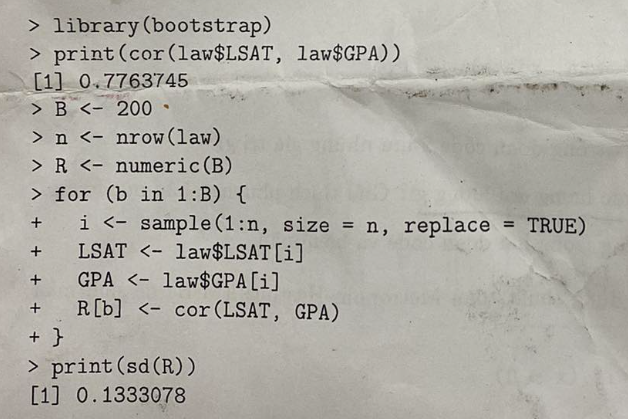

- Code 2:

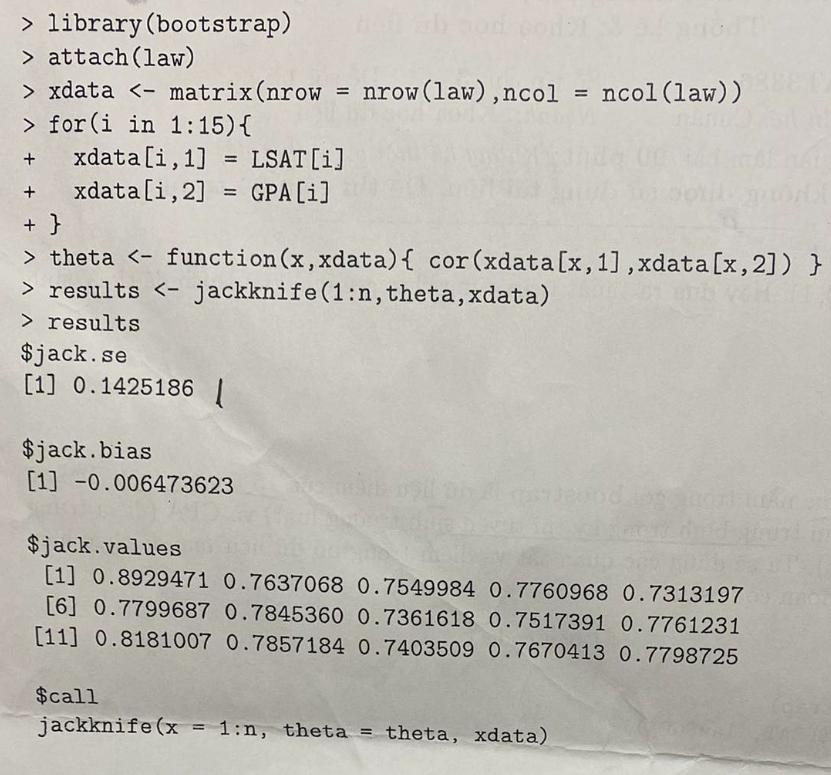

- Code 1 bằng python

In [50]:
B = 200
n = law.shape[0]
R = np.zeros(B)

for b in range(B):
    i = np.random.choice(np.arange(1, n), size=n, replace=True)
    LSAT = law["lsat"][i]
    GPA = law["ugpa"][i]

    R[b] = np.corrcoef(LSAT, GPA)[0, 1] # Or [1, 0]

np.std(R)

0.020982961693885253

a) Vòng lặp for trong đoạn code 1 tính toán và lưu trữ giá trị gì?
- Vòng lặp for tính toán hệ số tương quan (correlation coefficient)
- Vòng lặp for lưu trữ các cột LSAT và GPA của data law lấy theo i hàng ngẫu nhiên có hoàn lại

b) Đoạn code 1 có mục đích ước lượng đại lượng gì? Giải thích phương pháp ước lượng.
- Đoạn code trên ước lượng độ lệch chuẩn (sai số chuẩn) của các giá trị hệ số tương quan
- Ước lượng bằng phương pháp Monte Carlos:
    - Số lần mô phỏng: B = 200
    - Mảng R chứa B giá trị hệ số tương quan tính toán được sau mỗi lần lặp
    - Đưa ra ước lượng độ lệch chuẩn của mảng R

c) Giải thích đoạn code 2, kết quả results lưu những giá trị gì?
- jack.se: Standard Error (Độ lệch chuẩn, hoặc sai số chuẩn)
- jack.bias: Sai số của bộ số theta đánh giá được từ phương pháp jackknife, ở đây theta cụ thể là hệ số tương quan
- jack.values: Giá trị của theta sau mỗi lần jackknife, ở đây là bộ hệ số tương quan sinh ra từ jackknife
- call: Lệnh thực thi hàm jackknife

d) Đoạn code 2 mục đích ước lượng đại lượng gì? Giải thích phương pháp ước lượng
- Mục đích của đoạn code là ước lượng hệ số tương quan giữa hai biến LSAT và GPA trong tập dữ liệu law. Đoạn code sử dụng phương pháp jackknife để ước lượng hệ số tương quan và tính toán lỗi chuẩn và độ sai lệch.

e) So sánh giá trị ước lượng trong hai đoạn code và biện luận
- Monte carlos: STD = 0.133
- Jackknife: STD = 0.142 <br/>
=> Điều này có thể chỉ ra rằng Monte Carlo có sự ổn định hơn trong ước lượng so với Jackknife

---

### Câu 3:

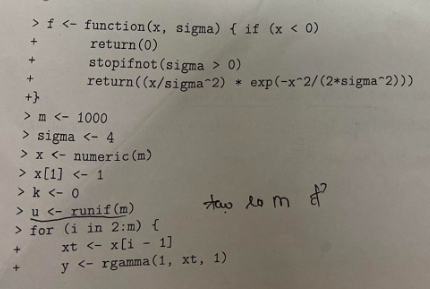

- a) Từ đoạn code trên, cho biết phân phối đề xuất và phân phối mục tiêu ở đây là gì? (Nếu không gọi được tên phân phối có thể viết hàm mật độ của phân phối đó)
- b) Cho biết giá trị u được gán bởi hàm runif(m) và tỉ lệ num/den là gì? Cho biết vai trò của chúng trong thuật toán M-H
- c) Cho biết tỉ lệ điểm đề xuất (candidate point) được chấp nhận là bao nhiêu? 
- Sau khi sinh mẫu, có đồ thị sau

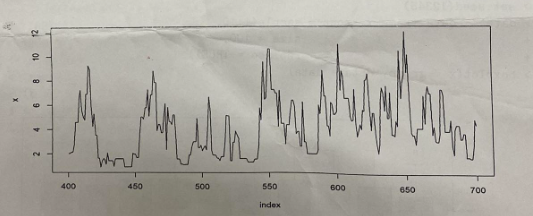

(hình 1)

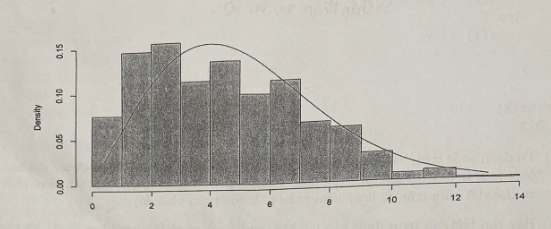

(hình 2)

- d) Cho biết đồ thị hình 1 trên là đồ thị mô tả biến thiên của đại lượng gì? Đồ thị này có thể hiện được các bước của thuật toán M-H hay không? Giải thích
- e) Đồ thị hình 2 là đồ thị gì? Ý nghĩa hình 2 trong thuật toán M-H

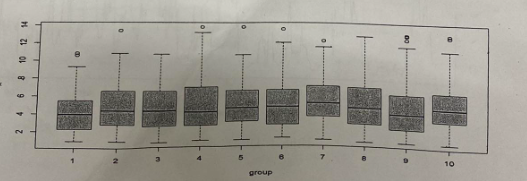

(hình 3)

- f) Ý nghĩa hình 3 và nhận xét kết quả
- g) Giải thích mục đích, ý nghĩa của đoạn code này

- Code bằng python

In [89]:
np.random.seed(192)
def f(x, sigma):
    if (x < 0):
        return 0
    f = (x/sigma**2) * np.exp(-x**2 / (2*sigma**2))
    return f

m = 1000
sigma = 4

x3 = np.zeros(m)
x3[0] = 1

k = 0
u = np.random.uniform(size=m)

for i in range(1, m):
    xt = x3[i - 1]
    y = np.random.gamma(shape=xt, scale=1)

    num = f(y, sigma) * gamma.pdf(xt, y, scale=1)
    den = f(xt, sigma) * gamma.pdf(y, xt, scale=1)

    alpha = num/den
    if (u[i] < alpha):
        x3[i] = y
    else:
        x3[i] = xt
        k += 1
k

290

In [91]:
(m - k)/m

0.71

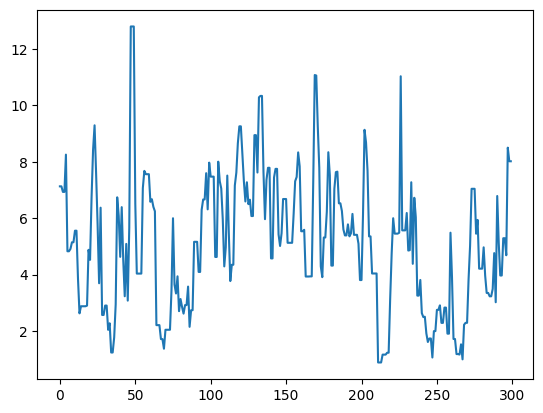

In [87]:
y3 = x3[400:700]
plt.plot(y3)

a) Từ đoạn code trên, cho biết phân phối đề xuất và phân phối mục tiêu ở đây là gì? (Nếu không gọi được tên phân phối có thể viết hàm mật độ của phân phối đó)


- Phân phối mục tiêu: Phân phối rayleigh
- Phân phối đề xuất: Phân phối gamma

b) Cho biết giá trị u được gán bởi hàm runif(m) và tỉ lệ num/den là gì? Cho biết vai trò của chúng trong thuật toán M-H


- u là vector chứa m giá trị theo phân phối đều trong khoảng (0, 1)
- alpha = num/den là xác suất chấp nhận (acceptance probability) của thuật toán M-H.

c) Cho biết tỉ lệ điểm đề xuất (candidate point) được chấp nhận là bao nhiêu? 


- (m-k)/m => (1000-290)/1000 = 0.71 => 71%

d) Cho biết đồ thị hình 1 trên là đồ thị mô tả biến thiên của đại lượng gì? Đồ thị này có thể hiện được các bước của thuật toán M-H hay không? Giải thích


- Đồ thị hình 1 mô tả sự biến thiên của đại lượng x[i]
- Đồ thị này thể hiện được các bước của thuật toán M-H, trên đồ thị, những khoảng mà đồ thị nằm ngang vuông góc với trục Oy tức là trong khoảng đó, các giá trị x[i] bị bác bỏ nên ko thay đổi mà giữ nguyên giá trị cũ.

e) Đồ thị hình 2 là đồ thị gì? Ý nghĩa hình 2 trong thuật toán M-H


- Hình 2 có 2 đồ thị cần phải quan tâm: Đồ thị histogram của các điểm thuộc x và đường thẳng thể hiện phân phối mục tiêu cần xấp xỉ.
- Dựa theo đồ thị histogram, nhìn chung đã có hình dáng giống với đường thẳng phân phối mục tiêu, tuy nhiên vẫn chưa fit cho lắm, chứng tỏ chưa hội tụ về hàm phân phối mục tiêu
<br/> => Sigma = 4 chưa phù hợp

f) Ý nghĩa hình 3 và nhận xét kết quả

- Đồ thị biểu hiện 10 nhóm
- Đường thẳng ở giữa các hộp là median của nhóm tương ứng. Ta có thể thấy median của 10 nhóm dữ liệu nằm trong khoảng x có giá trị từ 4 - 6.
- Sự phân tán của dữ liệu của mỗi nhóm được thể hiện bằng độ 'cao' của hộp (từ điểm thấp nhất đến điểm cao nhất của hộp). Ta thấy độ cao hộp giữa các nhóm khá đồng đều với nhau, đồng nghĩa với việc các nhóm dữ liệu phân tán khá đồng đều và nằm trong khoảng 2 - 8.
- Dây xuyên qua hộp thể hiện phạm vi của dữ liệu, (2 điểm trên dưới tương ứng là max, min). Min của tất cả các nhóm là xấp xỉ 1, max của tất cả các nhóm là xấp xỉ 14. Giá trị min của các nhóm khá đồng đều, giá trị max thì không.
- Các điểm không thuộc dây là những điểm ngoại lệ. Có thể thấy những điểm ngoại lệ khá ít, chứng tỏ dữ liệu khá ổn định.

g) Giải thích mục đích, ý nghĩa của đoạn code này

- Đoạn code này là phương pháp Metropolis Hasting, một phương pháp lấy mẫu xác suất dựa trên chuỗi markov, xấp xỉ phân phối của dữ liệu theo phân phối mục tiêu sử dụng phân phối đề xuất.